# Supervised Learning with Python and Recursive Partitioning Trees 

    1) Python is an open source, human readable and easy programming langauge.  Python is the most frequently used programming language for data analysis and "data science".

    2) A scripting programming language is often better suited for data analysis than point and click tools like Microsoft Excel, Microsoft Power BI and Tableau.  It makes it easier to keep track of the steps you've made and also makes your analysis easily reporducible.

    3) In the past data analysis in a business setting required a spreadsheet tool, database and business intelligence application.  This means an expensive overhead as far as licensing fees and setup go.

    4) the Anaconda distribution of python is easy to setup and manage through conda enviroments.


# Importing packages and data

In [16]:
# pandas is a package for handling dataframes. Dataframes can be thought of like excel spreadsheets.  
import pandas as pd
# the numpy package handles arrays, math and linear algebra operations.  This package is an important piece of the 
# python data science stack but is not essential to get started.
import numpy as np 
# matplotlib provies matlab style to python
import matplotlib.pyplot as plt 
# seaborn is a package for statistical visualizations.  It's worth looking into, it's one of my favoirte things about 
#the python data science stack.
import seaborn as sns
# this line of code plots matplotlib plots inline.
%matplotlib inline

I next use the pandas package to read a __comma seperated value file__ or __CSV__ into my local memory.  Because this file is utf-8 encoded I need to specify the encoding.  This typically should not be necessary.  I've found that this happens frequently when CSV files are made out of Microsoft Excel's .xls format.

In [17]:
#this simple line of code reads in a comma seperated value file into a dataframe.
store = pd.read_csv("Superstore.csv", encoding = "ISO-8859-1")
store.head()

,Category,City,Container,Customer ID,Customer Name,Customer Segment,Department,Item ID,Item,Order Date,...,Ship Date,Ship Mode,State,Discount,Order Quantity,Product Base Margin,Profit,Sales,Shipping Cost,Unit Price
0,Paper,Lombard,Small Box,3035,Mark Bailey,Home Office,Office Supplies,10074,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,11/8/2016,...,11/9/2016,Regular Air,Illinois,0.01,10,0.36,-76,53,5,5
1,Paper,Lombard,Wrap Bag,3035,Mark Bailey,Home Office,Office Supplies,10079,Telephone Message Books with Fax/Mobile Sectio...,11/11/2014,...,11/12/2014,Regular Air,Illinois,0.04,12,0.39,52,76,1,6
2,Pens & Art Supplies,Southbury,Wrap Bag,3385,Daniel Richmond,Corporate,Office Supplies,11012,"Premium Writing Pencils, Soft, #2 by Central A...",11/23/2015,...,11/23/2015,Express Air,Connecticut,0.04,5,0.57,-22,16,2,3
3,Binders and Binder Accessories,Coachella,Small Box,3133,Kristine Singleton,Corporate,Office Supplies,10646,Fellowes Black Plastic Comb Bindings,1/13/2016,...,1/25/2016,Regular Air,California,0.10,12,0.39,-350,65,8,6
4,Rubber Bands,Coachella,Wrap Bag,3133,Kristine Singleton,Corporate,Office Supplies,10138,Assorted Color Push Pins,1/13/2016,...,1/25/2016,Regular Air,California,0.03,10,0.52,4,19,1,2


# Basic Indexing and plotting

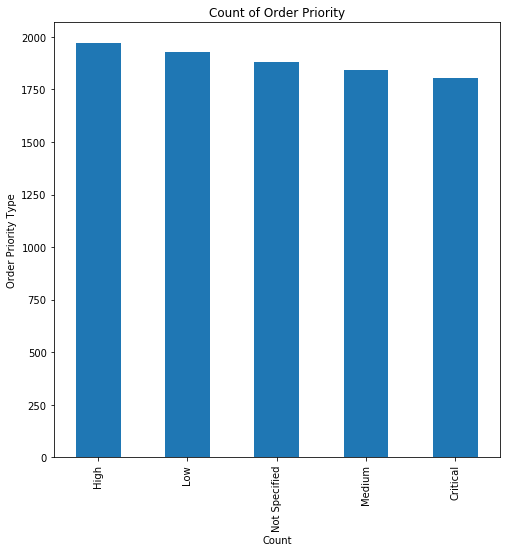

In [18]:
#Pandas dataframes can be thought of as a sheet in an excel workbook.  

#Individual columns can be selected as a pandas series using panda's standard indexing method DataFrame['Column"].
priority = store['Order Priority']

# I can then apply an aggregation the individual column I selected.

priority = priority.value_counts()

# I can then plot this data easily by using the .plot() method on the DataFrame.

# set the size of the figure
plt.figure(figsize=(8,8))

priority.plot(kind = 'bar')
plt.title("Count of Order Priority")
plt.xlabel("Count")
plt.ylabel("Order Priority Type")
plt.show()

# Data Munging 

1) I start by converting date columns into the pandas datetime format,which is ideal for analysis.

2) I create a new variable store['Processing Time']. This variable simply describes the difference between shipping date and order date.

3) I plot a seaborn distplot of the store['Processing Time'] array.  This function estimates and plots a kernel density estimate of the probability distribution of the random variable.  This can be thought of more simply as a smoothed histogram. Check here for more info http://www.dummies.com/programming/big-data/data-science/estimating-data-clusters-with-kernel-density-estimation/.



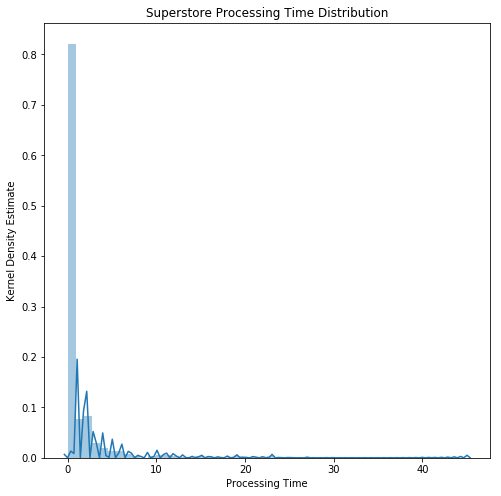

In [19]:
#Converting the date columns to the pandas datetime format. This provides powerful indexing ability and allows pandas treat these columns as dates. 
store['Order Date'] = pd.to_datetime(store['Order Date'])
store['Ship Date'] = pd.to_datetime(store['Ship Date'])
# Creating a new variable processing time - the difference between ship date and order date.
store['Processing Time'] = (store['Ship Date'] - store['Order Date']).dt.days
# I'm feeling lazy so I am am going to treat this one high value as an outlier
store = store[store["Processing Time"] < 350]

# set the size of the figure
plt.figure(figsize=(8,8))

sns.distplot(store['Processing Time'])
plt.title("Superstore Processing Time Distribution")
plt.ylabel("Kernel Density Estimate")
plt.show()

#  Examine the variable of interest: Sales

I want to create a predictive model to predict the quantitative variable store['Sales'].  This variable is the line total per transaction in the supestore dataset. This can be helpful for managment decisions. 

1) The data has a serious right skew.  A log transformation makes the data look aproximately symetric.  I am going to use decision tree models to predict sales.  These do not require the response variable to be normal like many other classic statisitcal methods.  A symetric distribtion does help any predictive algorithm to be more accurate.

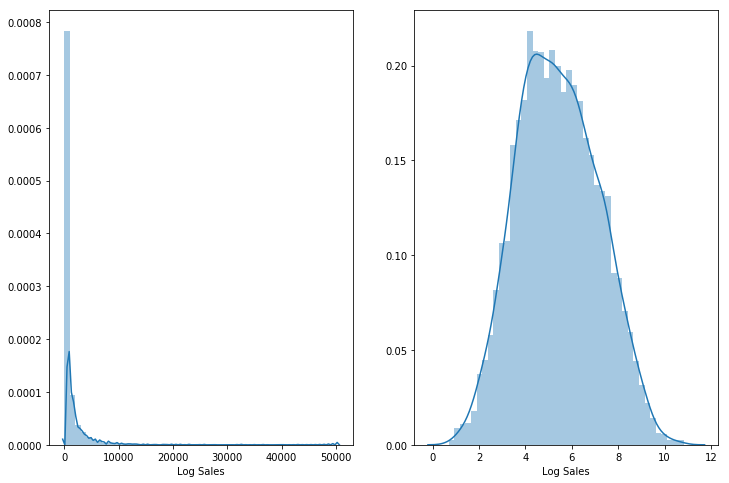

In [20]:
# set the size of the figure
f,ax=plt.subplots(1,2,figsize=(12,8))
#plt.figure(figsize=(8,8))

# initalize the distplot object with the column of interest in the pandas dataframe

sns.distplot(store['Sales'], ax=ax[0])
ax[0].set_xlabel("Log Sales")

# add a simple title to the plot
store['Log Sales'] = np.log(store['Sales'])
sns.distplot(store['Log Sales'], ax=ax[1])

plt.show()

###  Horizontal barplot

The store['State'] column is a __High Cardinality__ variable.  This means that it has many unique values. I wonder if there is a geographic trend in the superstore sales.  It seems that there are more transactions with states that have higher populations.  There doesn't seem to necessarily be a geographic cluster where sales are concetrated.  

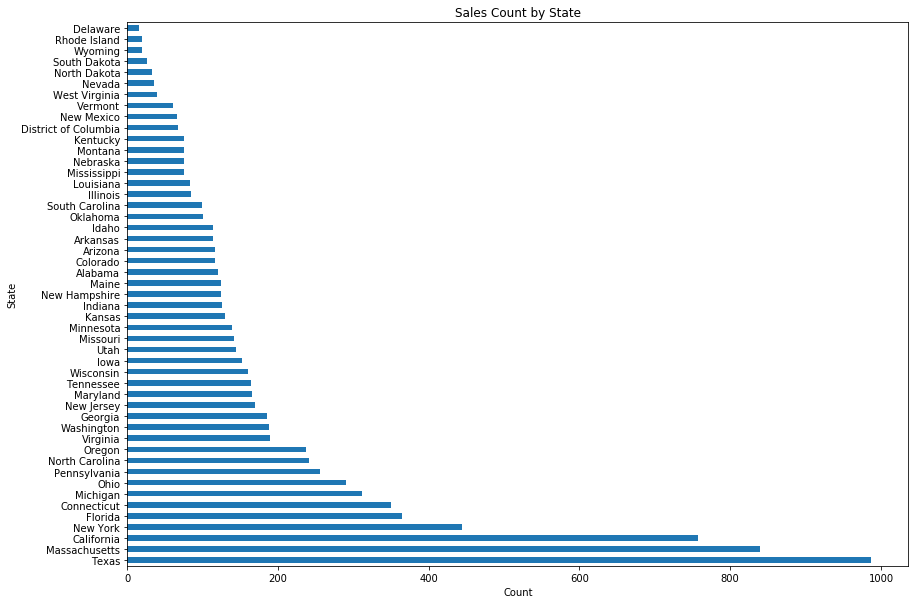

In [21]:
# set the size of the plot
plt.figure(figsize=(14,10))

# use the pd.value_counts() method to return counts of unqiue values in the dataframe
stateCounts = store['State'].value_counts()

# use the pd.plot() method specifying the kind of the plot as 'barh'
stateCounts.plot(kind = 'barh')

# set the title
plt.title("Sales Count by State")
plt.ylabel("State")
plt.xlabel("Count")

plt.savefig('Sales_State.png')

# tell matplotlib to show the plot
plt.show()



# More than one column 

### Seaborn Regression Plot

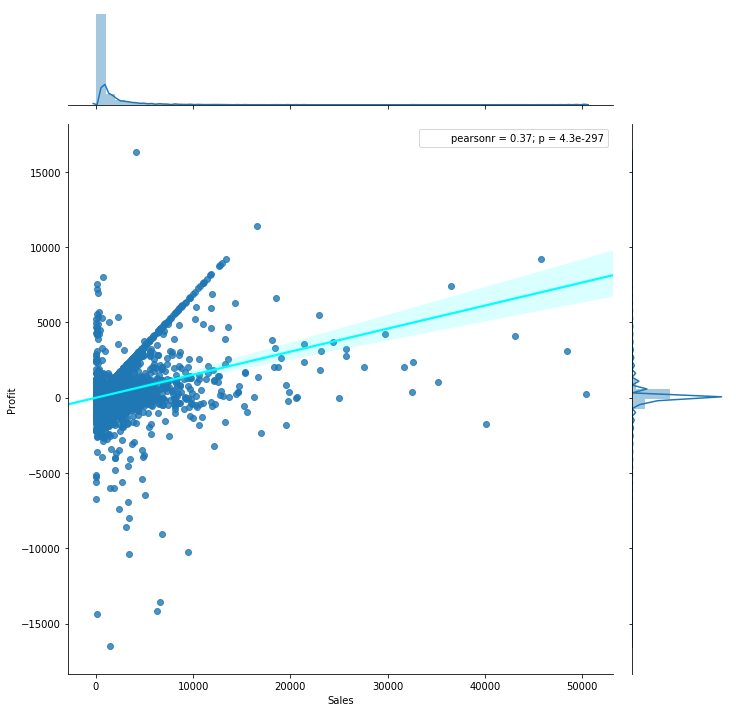

In [22]:
plt.figure(figsize=(10,10))
g = sns.jointplot(x="Sales", y="Profit", data=store, kind='reg',
                  joint_kws={'line_kws':{'color':'cyan'}}, size = 10) 
plt.show()

 $$ Model:   R^2 $$

In [89]:
0.27**2

0.0729

Across customer segment and department sales are pretty similar.  I use a seaborn violin plot to easily visualize a quite complex relationship.

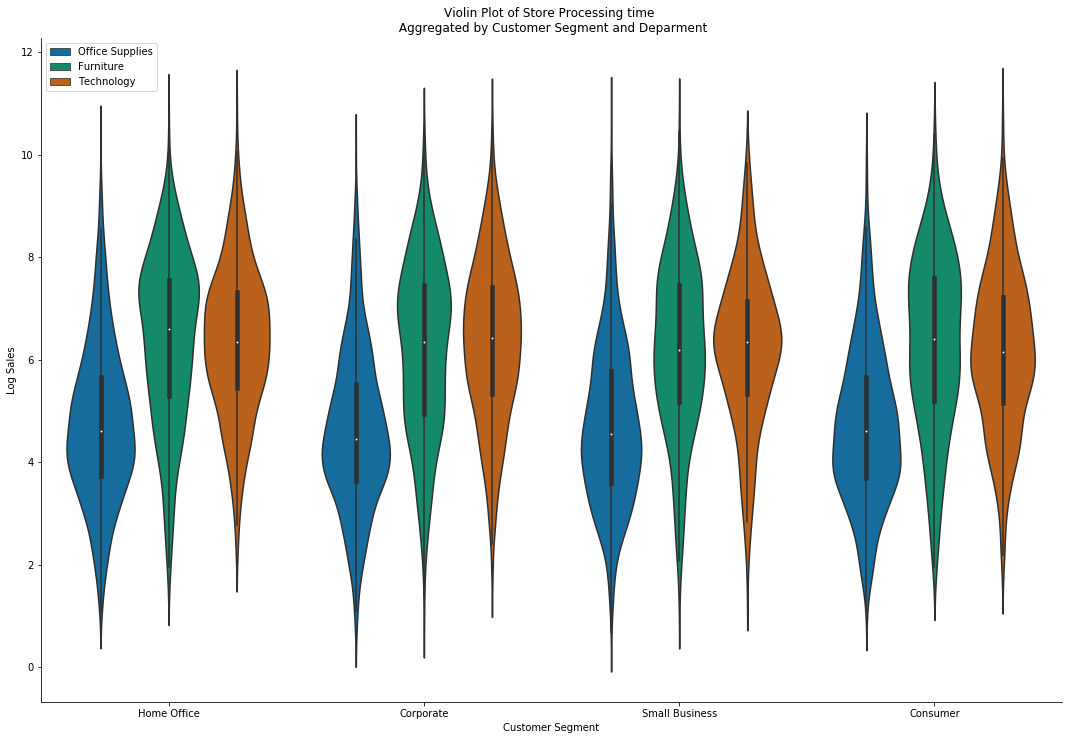

In [23]:
plt.figure(figsize=(8,8))


viol_plot = sns.factorplot(x="Customer Segment", 
                       y="Log Sales", 
                       hue="Department", 
                       data=store, 
                       palette="colorblind",
                       kind='violin',
                       size
                           = 10,
                       aspect = 1.5,
                       legend=False)

viol_plot.ax.legend(loc=2)
plt.title('Violin Plot of Store Processing time \n Aggregated by Customer Segment and Deparment')
plt.show()

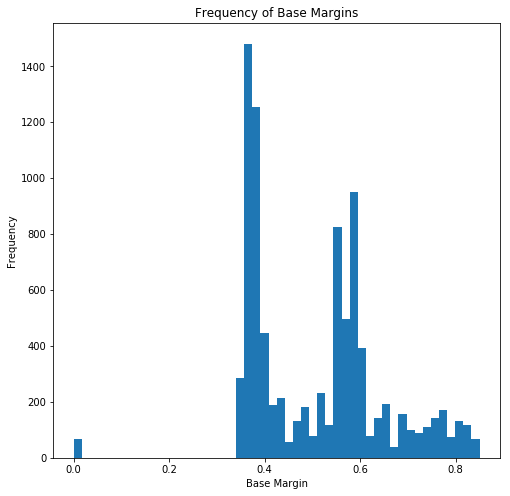

In [24]:
plt.figure(figsize=(8,8))
store.loc[:,'Product Base Margin'].plot(kind = 'hist', bins = 50)

plt.title("Frequency of Base Margins")
plt.xlabel("Base Margin")

plt.show()

In [25]:
store['Product Base Margin'].mean()

0.5080907477257633

Write a quick for loop to create list of numeric and string columns

In [26]:
str_list = []
numeric_list = []
for column in store:
    if store[column].dtype == object:
        str_list.append(column)
    else:
        numeric_list.append(column)  

Create a cluster heatmap to look for groups of correlated variables.  It seems like some varibales are moderately correlated, This will likely help the recursive partitioning tree models.

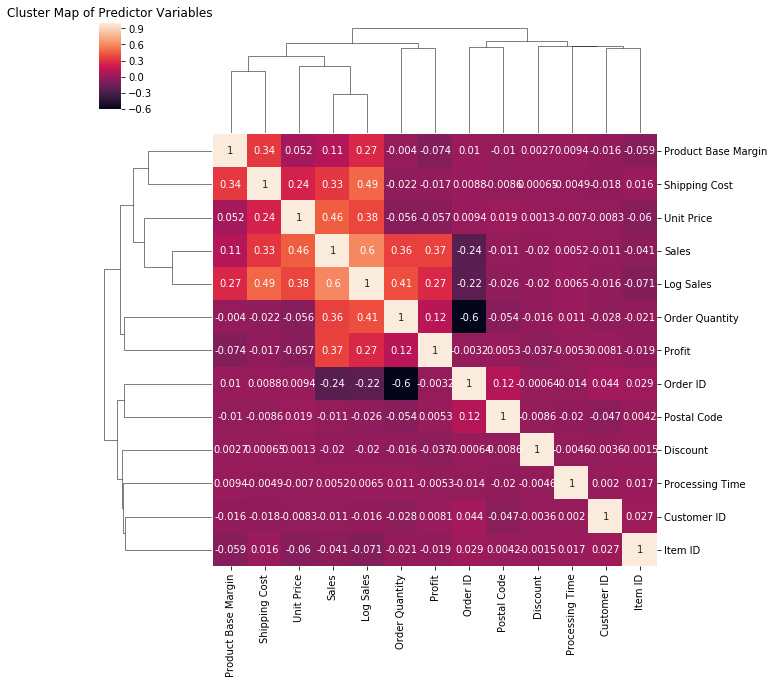

In [27]:
plt.figure(figsize=(8,8))

sns.clustermap(store[numeric_list].corr(), annot=True)
plt.title("Cluster Map of Predictor Variables")
plt.show()


In [28]:
store['Order Date']= pd.to_datetime(store['Order Date'])
store.set_index('Order Date', inplace = True)

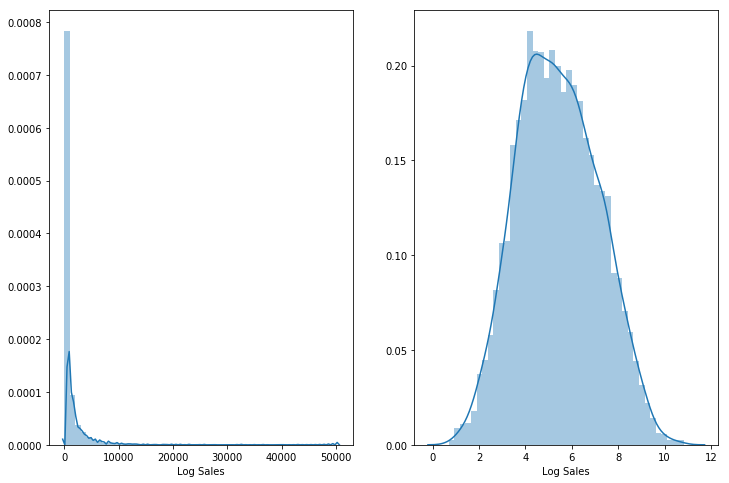

In [29]:
# set the size of the figure
f,ax=plt.subplots(1,2,figsize=(12,8))
#plt.figure(figsize=(8,8))

# initalize the distplot object with the column of interest in the pandas dataframe

sns.distplot(store['Sales'], ax=ax[0])
ax[0].set_xlabel("Log Sales")

# add a simple title to the plot
store['Log Sales'] = np.log(store['Sales'])
sns.distplot(store['Log Sales'], ax=ax[1])

plt.show()

Define a quick plotting function to show how functions work in the python language. I personally prefer brackets
to white-space, but it's not the end of the world.

In [67]:
import matplotlib.pyplot as plt, mpld3
import numpy as np
import matplotlib.pyplot as plt

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
plt.figure(1)
plt.figure(figsize=(14,12))
plt.subplot(311)
store['Sales'].resample('W').sum().plot()
plt.ylabel('Sum of Sales')
plt.xlabel("")
plt.title("Sum of Sales for Superstore Data")


plt.subplot(312)
store['Profit Percentage'] = store['Profit'] / store['Sales']
store['Profit'].resample('W').sum().plot()
plt.title("Average Profit / Sales Superstore Data")
plt.ylabel("Avg Profit Percentage")
plt.xlabel("")

plt.subplot(313)
sns.distplot(store['Profit'])

mpld3.display()

I create a new column profit percentage that is the profit divided by sales

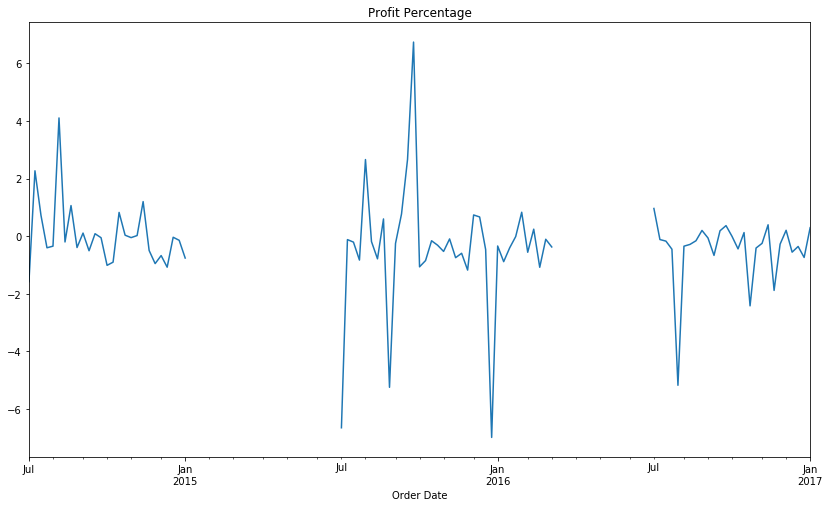

In [35]:
store['Profit Percentage'] = store['Profit'] / store['Sales']
plt.figure(figsize=(14,8))
store['Profit Percentage'].resample('W').mean().plot()
plt.title("Profit Percentage")
plt.show()

In [36]:
store['Margin %'] = store['Profit'] / store['Sales']

In [37]:
modelFrame = store[['Category', 'Container', 'Customer Segment', 'Department', 'Ship Mode', 'Discount', 
                    'Order Quantity', 'Log Sales', 'Profit', 'Shipping Cost', 'Product Base Margin']]

modelFrame = pd.get_dummies(modelFrame)



In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler


target_name = 'Log Sales'
Xframe = modelFrame.drop('Log Sales', axis=1)
data_names = Xframe.columns
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(Xframe)
y=modelFrame[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=123)

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
DecisionTree = tree.DecisionTreeRegressor()
DecisionTree.fit(X_train, y_train)
cv_scores = cross_val_score(DecisionTree, X_train, y_train, cv = 10)
DCTreePrediction = DecisionTree.predict(X_test)

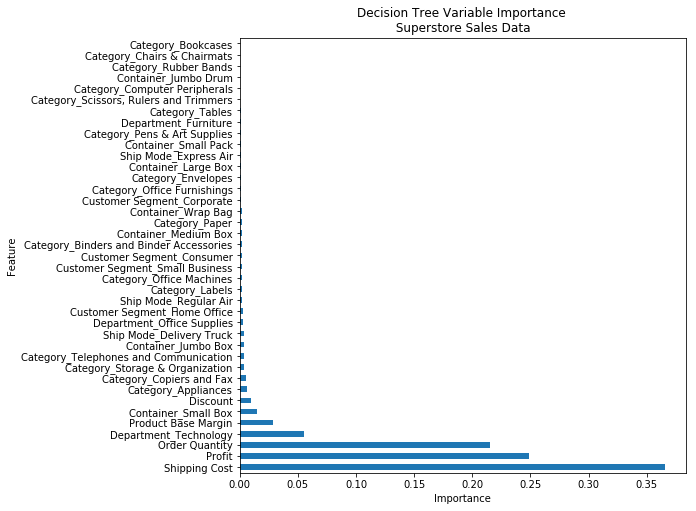

In [43]:
columnNames = Xframe.columns
importances = DecisionTree.feature_importances_
combined = {'Feature': columnNames, 'imp': importances}
df = pd.DataFrame(data=combined).sort_values(by = ['imp'], ascending=False)

df.plot(x='Feature', y='imp', kind='barh', figsize=(8,8), legend = False)
plt.title("Decision Tree Variable Importance \n Superstore Sales Data ")
plt.xlabel('Importance')
plt.show()

In [94]:
# Visualize data
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections

dot_data = tree.export_graphviz(DecisionTree,
                                feature_names=data_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
 
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
 
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
 
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
 
graph.write_png('tree.png')
 

True

In [73]:
for score in cv_scores:
    print(score)

0.80767180802
0.781605283061
0.797444641231
0.822217875153
0.804475738441
0.779815411838
0.769196587509
0.786226926557
0.786273537858
0.738939864947


In [57]:
DecisionTree.score(X_test, y_test)

0.77774219410706424

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, y_train)
cv_scores = cross_val_score(rfmodel, X_train, y_train, cv = 10)
rfpmodel = rfmodel.predict(X_test)

Mean Square Error of 'Log Sales' variable

In [125]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, rfpmodel))
print(rms)

0.6104881018808942


Cross-Valadation pseudo R^2|

In [126]:
cv_scores

array([ 0.89086587,  0.8696432 ,  0.90529972,  0.9024536 ,  0.88104195,
        0.8783466 ,  0.8716965 ,  0.86744323,  0.88705147,  0.84895379])

Test set valadation R^2

In [133]:
rfmodel.score(X_test, y_test)

0.87853987306715986

[ 85489.86868342]


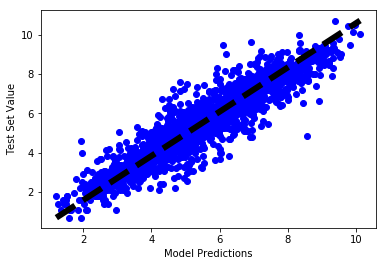

In [138]:
plt.scatter(rfpmodel, y_test, color = 'b')
plt.plot([rfpmodel.min(), rfpmodel.max()], [y_test.min(), y_test.max()], 'k--', lw=6)
plt.ylabel("Test Set Value")
plt.xlabel("Model Predictions")


In [130]:
import matplotlib.pyplot as plt, mpld3
plt.plot([3,1,4,1,5], 'ks-', mec='w', mew=5, ms=20)
mpld3.display()


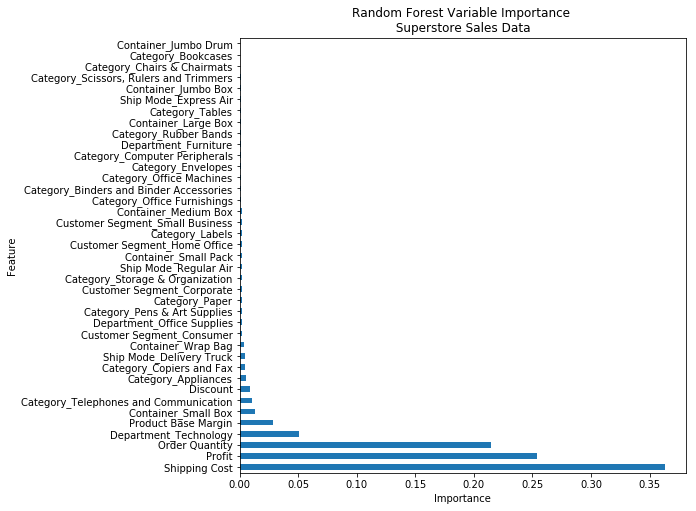

In [131]:
columnNames = Xframe.columns
importances = rfmodel.feature_importances_
combined = {'Feature': columnNames, 'imp': importances}
df = pd.DataFrame(data=combined).sort_values(by = ['imp'], ascending=False)

df.plot(x='Feature', y='imp', kind='barh', figsize=(8,8), legend = False)
plt.title("Random Forest Variable Importance \n Superstore Sales Data ")
plt.xlabel('Importance')
plt.show()

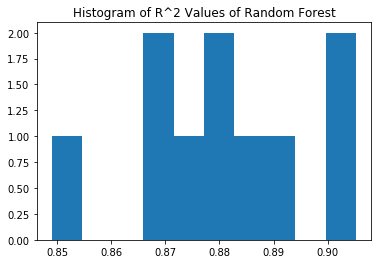

In [132]:
cv_scores.shape
plt.hist(cv_scores)
plt.title('Histogram of R^2 Values of Random Forest')

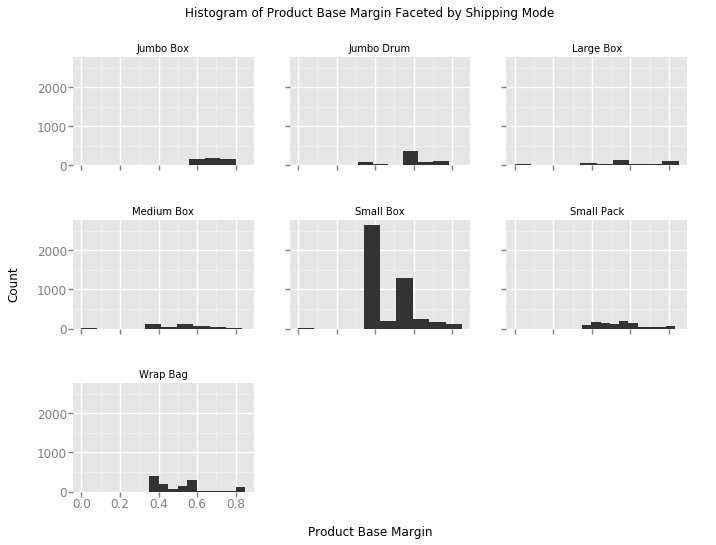

<ggplot: (7565163980)>

In [38]:
from ggplot import *
ggplot(store, aes('Product Base Margin')) + geom_histogram() + \
labs(title = "Histogram of Product Base Margin Faceted by Shipping Mode", y = "Count") +\
facet_wrap("Container") 
